50
L = 2.9820408163265304
60
L = 3.3717514124293784
70
L = 3.7229813664596274
80
L = 3.518354430379747
90
L = 3.5902621722846444
100
L = 3.9886868686868686
110
L = 3.913094245204337
120
L = 4.138375350140056
130
L = 4.069528920691711
140
L = 4.230935251798561
150
L = 4.115078299776286
160
L = 4.315801886792453
170
L = 4.235294117647059
180
L = 4.374425822470515
190
L = 4.5211361737677525
200
L = 4.606934673366834
210
L = 4.699384825700615
220
L = 4.488169364881694
230
L = 4.687260299981014
240
L = 4.77918410041841
[2.9820408163265304, 3.3717514124293784, 3.7229813664596274, 3.518354430379747, 3.5902621722846444, 3.9886868686868686, 3.913094245204337, 4.138375350140056, 4.069528920691711, 4.230935251798561, 4.115078299776286, 4.315801886792453, 4.235294117647059, 4.374425822470515, 4.5211361737677525, 4.606934673366834, 4.699384825700615, 4.488169364881694, 4.687260299981014, 4.77918410041841]


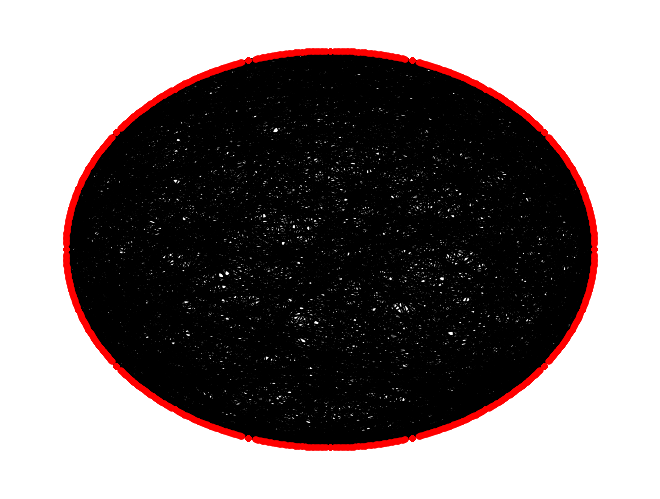

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

lists = []

min=5

max=25

for i in range(min, max):
   print(10*i)
   ws03 = nx.watts_strogatz_graph(10*i, 4, 0.3)
   lists.append(nx.average_shortest_path_length(ws03))

   nx.draw_circular(ws03, node_size=10, node_color='red')
   print("L =", nx.average_shortest_path_length(ws03))

print(lists)

In [5]:
import numpy as np

list_a=[]
for x in range(min , max):
   list_a.append(np.log(10*x))

print(list_a)


[np.float64(3.912023005428146), np.float64(4.0943445622221), np.float64(4.248495242049359), np.float64(4.382026634673881), np.float64(4.499809670330265), np.float64(4.605170185988092), np.float64(4.700480365792417), np.float64(4.787491742782046), np.float64(4.867534450455582), np.float64(4.941642422609304), np.float64(5.0106352940962555), np.float64(5.075173815233827), np.float64(5.135798437050262), np.float64(5.19295685089021), np.float64(5.247024072160486), np.float64(5.298317366548036), np.float64(5.3471075307174685), np.float64(5.393627546352362), np.float64(5.438079308923196), np.float64(5.480638923341991)]


In [7]:
import pandas as pd
df = pd.DataFrame(
    list_a
)
df[1] =lists

df.columns = ['logtotalnumberofsites','meangraphdistance']

df

,logtotalnumberofsites,meangraphdistance
0,3.912023,2.982041
1,4.094345,3.371751
2,4.248495,3.722981
3,4.382027,3.518354
4,4.499810,3.590262
5,4.605170,3.988687
6,4.700480,3.913094
7,4.787492,4.138375
8,4.867534,4.069529
9,4.941642,4.230935


<Axes: xlabel='logtotalnumberofsites', ylabel='meangraphdistance'>

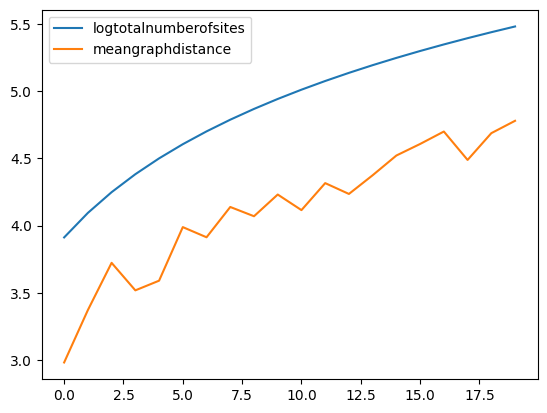

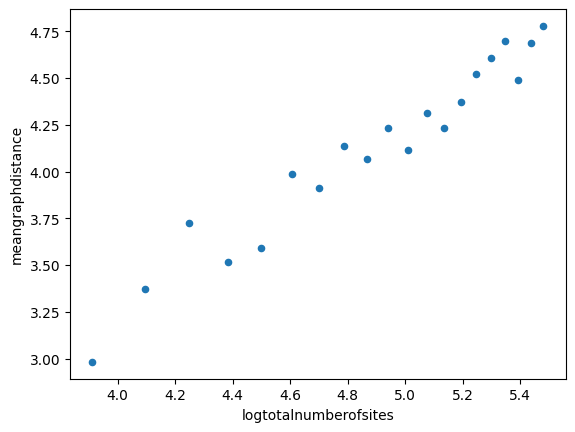

In [8]:
import numpy
import pandas
import matplotlib.pyplot as plt
df.plot()
df.plot.scatter(x='logtotalnumberofsites', y='meangraphdistance')

In [10]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression(fit_intercept = True)
lm = mod.fit(df[["logtotalnumberofsites"]], df[["meangraphdistance"]])
print(lm)

print(mod.coef_)
print(mod.intercept_)

slope =  mod.coef_[0,0]
print(slope)

interception = mod.intercept_[0]

print(interception)


LinearRegression()
[[1.01012599]]
[-0.81492925]
1.0101259929986424
-0.8149292537266142


/tmp/ipython-input-2090845344.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


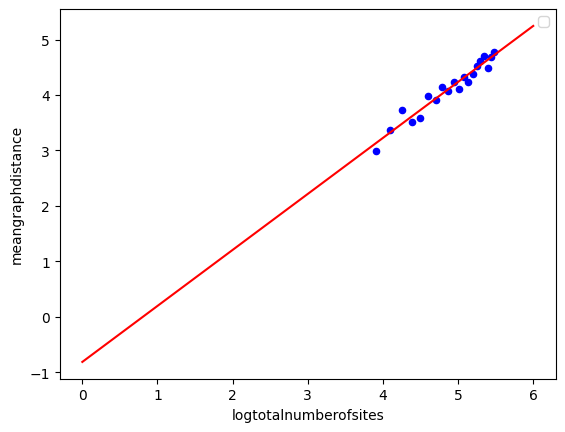

In [11]:
x = np.linspace( 0, 6, 10)
y = slope * x + interception
df.plot.scatter(x='logtotalnumberofsites', y='meangraphdistance',color="b")
plt.plot(x, y,color="r")
plt.legend()